<a href="https://colab.research.google.com/github/susanje/clusteringpractica/blob/main/Kmeanspractica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kneed #importo codo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
from kneed import KneeLocator #importo el localizador del codo 
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Primero generar datos bimensionales a traves de la función de scikitlearn makebloob que genera clusters sinteticos según algunos parámetros(n_samples: numero total de muestras a generar; centres: nro de centros a generar; cluster_std: desviac estandar)

In [ ]:
features, true_labels = make_blobs( #make_bloobs va devolver una tupla de 2 valores, en la primer tupla va a estar los valores de x e y para cada muestra y la segunda tupla va contener las etiquetas de grupos de cada muestra
n_samples=300,
centers=4,
cluster_std=0.60,
random_state=0 #en entero
)

In [ ]:
features[:5]#vemos los primeros 5 elementos de cada variable hecha x make_bloobs

array([[ 0.83685684,  2.13635938],
       [-1.4136581 ,  7.40962324],
       [ 1.15521298,  5.09961887],
       [-1.01861632,  7.81491465],
       [ 1.27135141,  1.89254207]])

In [ ]:
true_labels[:5] #son las etiquetas para cada punto de datos

array([1, 3, 0, 3, 1])

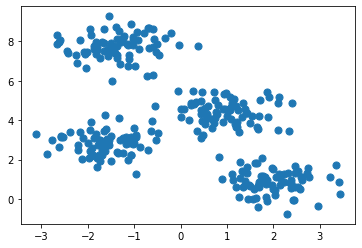

In [ ]:
plt.scatter(features[:, 0], features[:, 1], s=50);#graficamos sin las etiquetas y facilmente se distinguen 4 grupos

In [ ]:
scaler = StandardScaler() #escalamos los datos puesto que en diferentes columnas los datos pueden estar representados en diferentes medidas(ej: altura, peso) y si no lo hiciera se le daria mas valor a los datos de peso x ser mas grande
X = scaler.fit_transform(features)
X[:5]

array([[ 0.51625508, -0.70722723],
       [-0.86166376,  1.3290677 ],
       [ 0.71117444,  0.43704896],
       [-0.61979222,  1.48557283],
       [ 0.78228231, -0.8013784 ]])

**Construcción de un modelo de K-Means**
Estimador KMeans en scikit-learn es donde establece los parámetros del algoritmo antes de ajustar el estimador a los datos


In [ ]:
kmeans = KMeans(
init="random", #establecemos como tecnica de inicialización random, normalmente se pone este valor, podemos poner au k-means++ para acelerar la convergencia
n_clusters=4,#decimos cuantas k queremos para esta agrupacion
n_init=10,#decimos con cuantos inicializadores debe realizar
max_iter=300,#estaclemos el numero max de iteraciones para cada inicializacion
random_state=0
)#Hace diez ejecuciones del algoritmo k-means en los datos con un máximo de 300 iteraciones por ejecución

In [ ]:
kmeans.fit(X)#entrenamos el modelo


KMeans(init='random', n_clusters=4, random_state=0)

In [ ]:
kmeans.inertia_#evaluamos los atributos

56.0247705750995

In [ ]:
kmeans.cluster_centers_#localizamos los centroides

array([[-0.83691948,  1.46193015],
       [ 0.58536699,  0.17425154],
       [ 1.21774671, -1.19712077],
       [-0.96619422, -0.43906093]])

In [ ]:
kmeans.n_iter_#vemos el numero de interacciones requeridas para converger

6

In [ ]:
kmeans.labels_[:5] #las asignaciones de clústeres se almacenan como una matriz NumPy unidimensional en kmeans.labels_. Vemos las 5 primeras variables predichas

array([2, 0, 1, 0, 2], dtype=int32)

In [ ]:
y_kmeans = kmeans.predict(X) #tambien podemos acceder a las etiquetas predichas con el metodo predict
y_kmeans[:5]

array([2, 0, 1, 0, 2], dtype=int32)

**Visualización de los resultados**

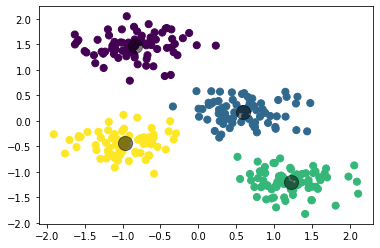

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_#vemos como le decis que dibuje los centros en cluster_centers
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Tambien podemos ubicar los centroides con la siguiente funcion



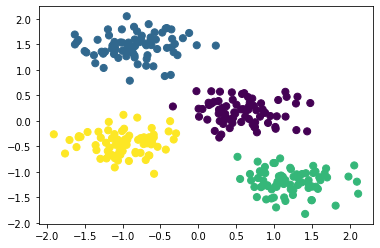

In [ ]:
from sklearn.metrics import pairwise_distances_argmin #maximizacion de expectativa
import numpy as np

def find_clusters(X, n_clusters, rseed=2):
    # 1. elegir los clusters aleatoriamente
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Asignar las etiquetas en base a la proximidad mas cercana al centro
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Hallar un nuevo centro para ese conjunto de datos
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Ckequeamos la convergencia
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)#aplicamos la funcion a nuestros datos
plt.scatter(X[:, 0], X[:, 1], c=labels,#ploteamos los datos
            s=50, cmap='viridis');

Ojo porque si inicializamos en otro punto tendremos otro resultado

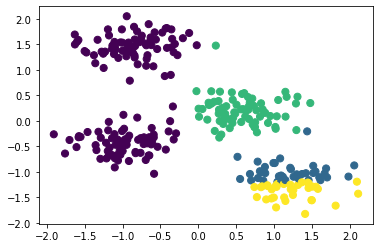

In [ ]:
centers, labels = find_clusters(X, 4, rseed=0) #fijemosnos que agregamos el rseed=0 y cambia el agrupamiento de los datos
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');#se observa convergencia pero no es la mas optima x eso hay que ejecutar varias veces de manera sacar conjeturas iniciales, como lo hace scikitlearn con el para parametro n_init q x default esta en 10

Una gran desventaja de Kmenas es que no aprende de los datos la cantidad de clusters optima hay que ponerlo de antemano

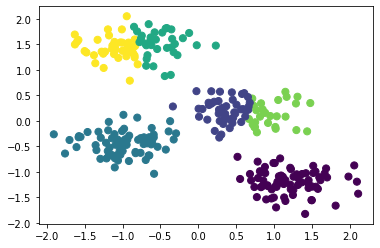

In [ ]:
labels = KMeans(6, random_state=0).fit_predict(X) #fijemosnos que acá le pedimos que haga 6 clusteres y los divide por criterio arbitrario
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

Por para datos mas completos se suguiere usar otro tipo de algoritmo de agrupamiento mas complicado, que pueda evaluar cuantitavamente mejor el numero de clusteres, x ejemplo: modelos de mezcla gaussiana o que determine solo la cantidad de clusters como DBSCAN, desplazamiento medio o propagación por afinidad. WARNING: ¡Kmeans se limita a divisiones lineales!

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

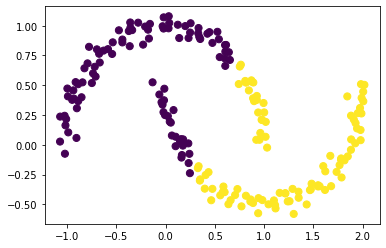

In [ ]:
labels = KMeans(2, random_state=0).fit_predict(X) #veamos como acá que la division es mas complicada y no puede definir linealmente kmeans falla
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

Probar como truco llevar la separación a un nivel superior para que kmeans descubra limites no lineales, habría que kernenlizar kmeans como lo hace scikit-learn en SpectralClustering, usa el gráfico de vecinos más cercanos para calcular una representación de mayor dimensión de los datos y luego asigna etiquetas usando un algoritmo de k-medias:

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


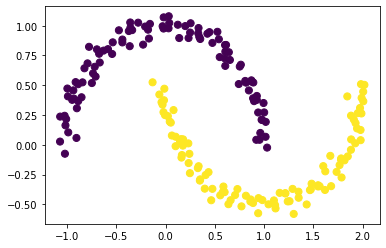

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', #veamos que en afinidad ponemos vecinos mas cercanos y ahora sí clasifica bien
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

Para un dataset muy grande Kmeans puede ser lento, ya que en cada iteración de k-means debe acceder a todos los puntos del conjunto de datos, el algoritmo puede ser relativamente lento a medida que aumenta la cantidad de muestras. Esto se puede solucionar usando un subconjunto de los datos para actualizar los centros de clúster en cada paso(k-means basados ​​en lotes-batch-sklearn.cluster.MiniBatchKMeans). 

**Kmeans basados en lotes**

Vamos a usar k-means para identificar dígitos similares sin usar la información de la etiqueta original; esto podría ser similar a un primer paso para extraer el significado de un nuevo conjunto de datos sobre el cual no tiene ninguna información de etiqueta a priori.


In [ ]:
from sklearn.datasets import load_digits #eva sublibreria contiene las imagentes de los digitos del 0 al 9
digits = load_digits()
digits.data.shape #aca cada una de los 64 features responde a caracteristicas de la imagen como brillo, color, pixel, etc

(1797, 64)

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=0) #le decimos que divida en 10 grupos
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape #divide los grupos en 10 por que son 10 numeros a evaluar

(10, 64)

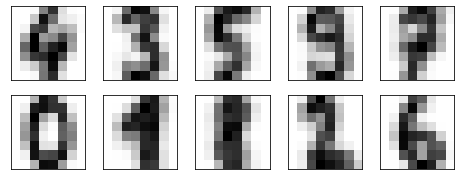

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3)) #vemos que sin las etiquetas puede identificar bastante bien los digitos en los clusteres correspondientes, tiene problemas con 1 y 8 solamente
centers = kmeans.cluster_centers_.reshape(10, 8, 8) 
for axi, center in zip(ax.flat, centers): #creamos esta funcion para que etiquete dentro de cada grupo un centro determinado por la cercania
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary) 
    

In [ ]:
from scipy.stats import mode #calcula la moda
#el problema de 1 y 8 lo arreglamos, coincidiendo la etiqueta del cluster con la real a lo largo del array en un axis especifico

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [ ]:
from sklearn.metrics import accuracy_score #medimos que tan bien clasifico los datos 
accuracy_score(digits.target, labels) #vemos que un algoritmo simple clasificamos bien el 80% de los datos

0.7935447968836951

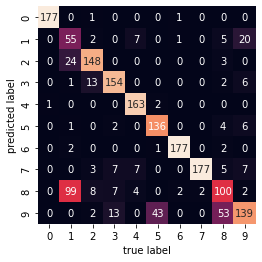

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names, #con el target_name traemos los clusteres que clasifico
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label'); #como ya habiamos notado la mayor confusion esta en el 1(en 8 la matriz de confusion es 99) y 8 (en 9 la matriza de confusion es 53), pero mas alla de eso pudimos hacer la clasificacion sin ninguna etiqueta

In [ ]:
from sklearn.manifold import TSNE #probemos con el algoritmo de incrustación de vecinos estocásticos distribuidos en t, para preprocesar los datos antes de realizar k-means

# Proyectamos los datos
tsne = TSNE(n_components=2, init='random', random_state=0)  #t-SNE es un algoritmo de incrustación no lineal que es particularmente hábil para preservar puntos dentro de grupos.
digits_proj = tsne.fit_transform(digits.data)

# Computamos los clusteres
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Cambiamos las etiquetas
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# medimos la precision del modelo
accuracy_score(digits.target, labels) #dio casi un 95% de precision para datos no etiquetados!

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


0.9432387312186978

**Kmeans para comprension de color**

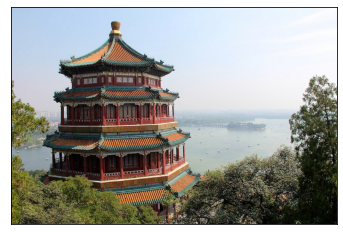

In [ ]:
#Pillow ya viene pre instalado en colab
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china); #En la mayoría de las imágenes, una gran cantidad de colores no se usarán y muchos de los píxeles de la imagen tendrán colores similares o incluso idénticos

In [ ]:
china.shape #3 dimensiones alto,ancho, RGB(tiene contribuciones de rojo/azul/verde como números enteros de 0 a 255)

(427, 640, 3)

Una forma en que podemos ver este conjunto de píxeles es como una nube de puntos en un espacio de color tridimensional. Cambiaremos la forma de los datos a [n_samples x n_features] y cambiaremos la escala de los colores para que estén entre 0 y 1:

In [ ]:
data = china / 255.0 # usar escala de 0...1
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):#Podemos visualizar estos píxeles usando un subconjunto de 10 000 píxeles para mayor eficiencia
    if colors is None: #armos una funciíon para amoldar los datos
        colors = data
    
    # Elegir un subset de manera aleatoria
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

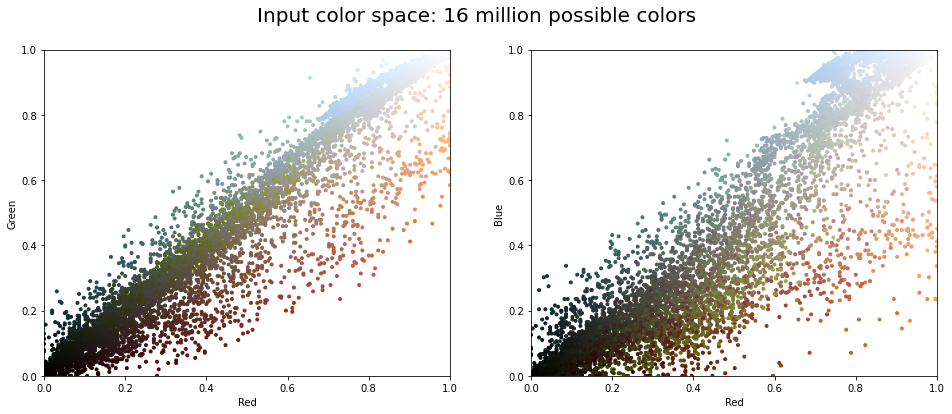

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

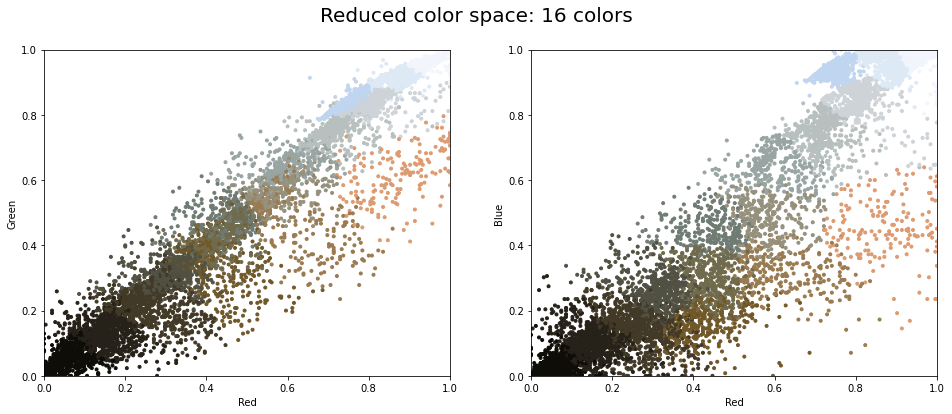

In [ ]:
import warnings; warnings.simplefilter('ignore')  # para ignorar los problemos NumPy.

from sklearn.cluster import MiniBatchKMeans #Debido a que tenemos un conjunto de datos muy grande, usamos el mini lote k-means, que opera en subconjuntos de datos para calcular el resultado mucho más rápido que el algoritmo estándar de k-means
kmeans = MiniBatchKMeans(16) #reducimos a solo 16 colores los 16 millones colores, usando agrupamiento de k-means en el espacio de píxeles
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

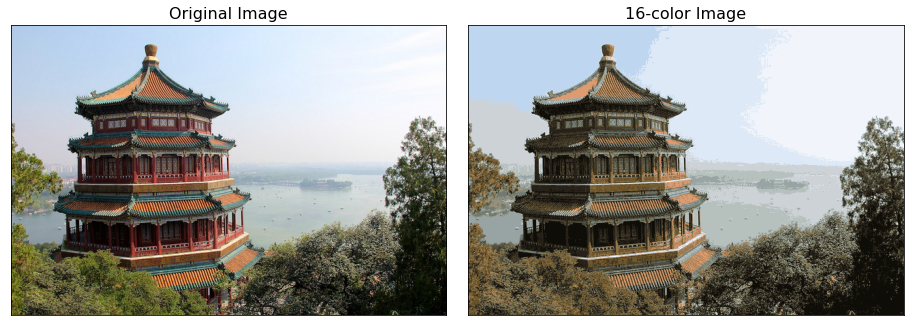

In [ ]:
china_recolored = new_colors.reshape(china.shape)
#El resultado es una nueva coloración de los píxeles originales, a cada píxel se lo asigno el color de su centro de grupo más cercano. 
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

Se observa que se pierden algunos detalles pero las formas se pueden seguir entiendo bien